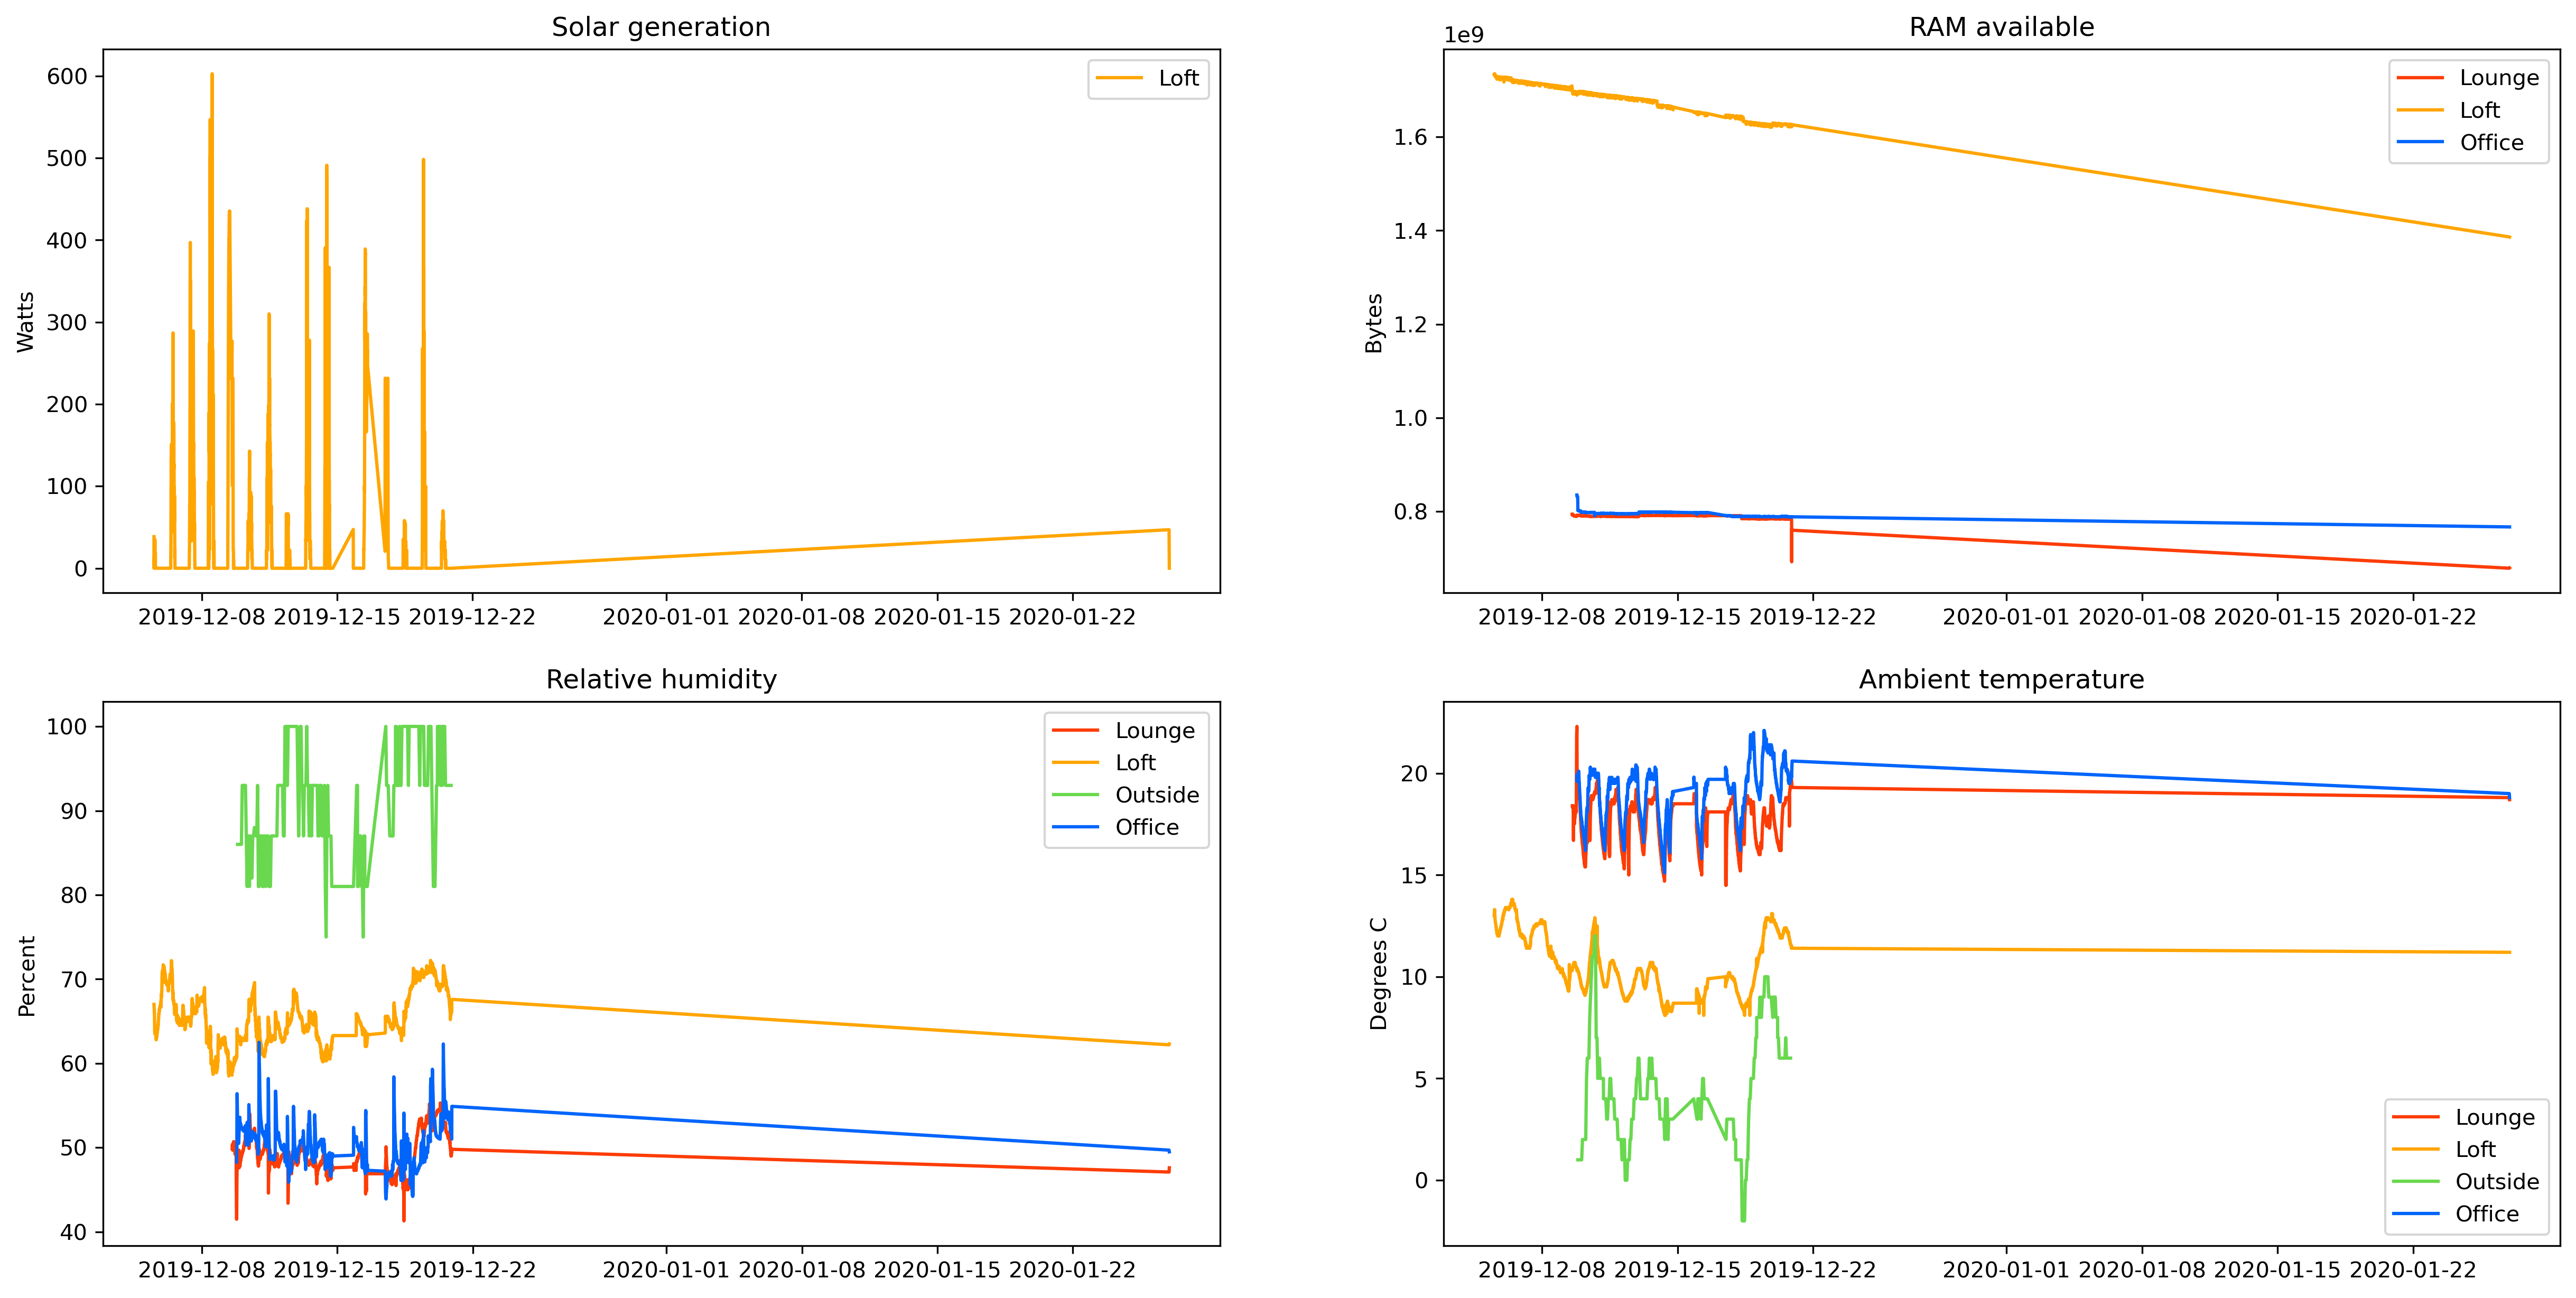

In [1]:
from apd.aggregation.analysis import interactable_plot_multiple_charts, configs
from apd.aggregation.utils import jupyter_page_file, profile_with_yappi, yappi_package_matches
import yappi

with profile_with_yappi():
    plot = interactable_plot_multiple_charts()
    plot()

with jupyter_page_file() as output:
    yappi.get_func_stats(filter_callback=lambda stat:
        yappi_package_matches(stat, ["apd.aggregation"])
    ).print_all(output)



Clock type: WALL
Ordered by: totaltime, desc

name                                  ncall  tsub      ttot      tavg      
..futures\thread.py:52 _WorkItem.run  7      0.000092  3.204091  0.457727
..tion\analysis.py:373 run_in_thread  1      0.000053  1.844382  1.844382
..38\Lib\threading.py:859 Thread.run  2/1    0.000025  1.839877  0.919939
..rrent\futures\thread.py:66 _worker  2/1    0.000022  1.839852  0.919926
..lectorEventLoop.run_until_complete  1      0.000027  1.839745  1.839745
..ndowsSelectorEventLoop.run_forever  1      0.000088  1.839611  1.839611
..WindowsSelectorEventLoop._run_once  17     0.000408  1.839497  0.108206
..alysis.py:327 plot_multiple_charts  1      1.643447  1.839309  1.839309
..py:635 ThreadPoolExecutor.__exit__  1      0.000005  1.837286  1.837286
..py:230 ThreadPoolExecutor.shutdown  1      0.000009  1.837281  1.837281
..8\Lib\threading.py:979 Thread.join  1      0.000006  1.837272  1.837272
..:1017 Thread._wait_for_tstate_lock  1      0.000011  1.837263

..hreading.py:388 Semaphore.__init__  2      0.000014  0.000267  0.000134
.._psycopg2._generate_generic_binary  5      0.000033  0.000264  0.000053
..s.py:1398 Line2D.set_dash_capstyle  30     0.000145  0.000262  0.000009
..\cbook\__init__.py:1938 <listcomp>  140    0.000205  0.000262  0.000002
..nal>:1520 path_hook_for_FileFinder  1      0.000022  0.000261  0.000261
..hes.py:330 Rectangle.set_edgecolor  12     0.000025  0.000260  0.000022
..es.py:768 Rectangle._convert_units  18     0.000084  0.000258  0.000014
..y:4696 _ColumnEntity.row_processor  27     0.000176  0.000257  0.000010
..k\lib\encodings\utf_8.py:15 decode  48     0.000188  0.000257  0.000005
..PGDialect_psycopg2.type_descriptor  13     0.000030  0.000257  0.000020
..:136 Affine2D._invalidate_internal  90/76  0.000214  0.000256  0.000003
..:395 WeakKeyDictionary.__setitem__  97     0.000253  0.000256  0.000003
..chemy\orm\query.py:4625 <listcomp>  27     0.000065  0.000250  0.000009
..tplotlib\lines.py:59 _scale_dashes  

..ession.py:1339 Session.expunge_all  1      0.000012  0.000033  0.000033
..lections.py:316 OrderedDict.values  5      0.000018  0.000032  0.000006
..\core\getipython.py:17 get_ipython  2      0.000022  0.000032  0.000016
..m\query.py:345 Query._adapt_clause  35     0.000032  0.000032  0.000001
..y:528 Text._update_clip_properties  15     0.000032  0.000032  0.000002
..94 QueryEventsDispatch.__getattr__  8      0.000027  0.000032  0.000004
..._bootstrap>:389 ModuleSpec.parent  14     0.000022  0.000032  0.000002
..etaData._colnames_from_description  6      0.000030  0.000032  0.000005
..\elements.py:688 Column.self_group  13     0.000031  0.000031  0.000002
..ompat.py:61 inspect_getfullargspec  2      0.000019  0.000031  0.000016
..compile.py:492 _get_charset_prefix  10     0.000024  0.000031  0.000003
..ticker.py:224 AutoLocator.set_axis  67     0.000031  0.000031  0.000000
..kref.py:436 WeakKeyDictionary.keys  1      0.000015  0.000031  0.000031
..tbox.py:739 DrawingArea.add_artist  

..teq6k\lib\copyreg.py:99 _slotnames  1      0.000004  0.000006  0.000006
..lotlib\axis.py:822 XAxis.get_scale  5      0.000006  0.000006  0.000001
..\matplotlib\axis.py:383 <dictcomp>  14     0.000006  0.000006  0.000000
..ckages\psycopg2\_range.py:36 Range  1      0.000006  0.000006  0.000006
..:493 Query._no_statement_condition  6      0.000006  0.000006  0.000001
...py:56 QueuePool._should_log_debug  1      0.000005  0.000006  0.000006
..b\artist.py:819 Line2D.get_clip_on  3      0.000006  0.000006  0.000002
..b\scale.py:43 LinearScale.__init__  16     0.000006  0.000006  0.000000
..ycopg2.py:741 _psycopg2_extensions  1      0.000003  0.000006  0.000006
..otlib\__init__.py:1267 get_backend  1      0.000002  0.000006  0.000006
..json.py:146 register_default_jsonb  1      0.000001  0.000006  0.000006
..otlib\rcsetup.py:123 validate_bool  1      0.000005  0.000006  0.000006
..my\engine\default.py:855 <genexpr>  11     0.000006  0.000006  0.000001
..y\util\_collections.py:140 __new__  

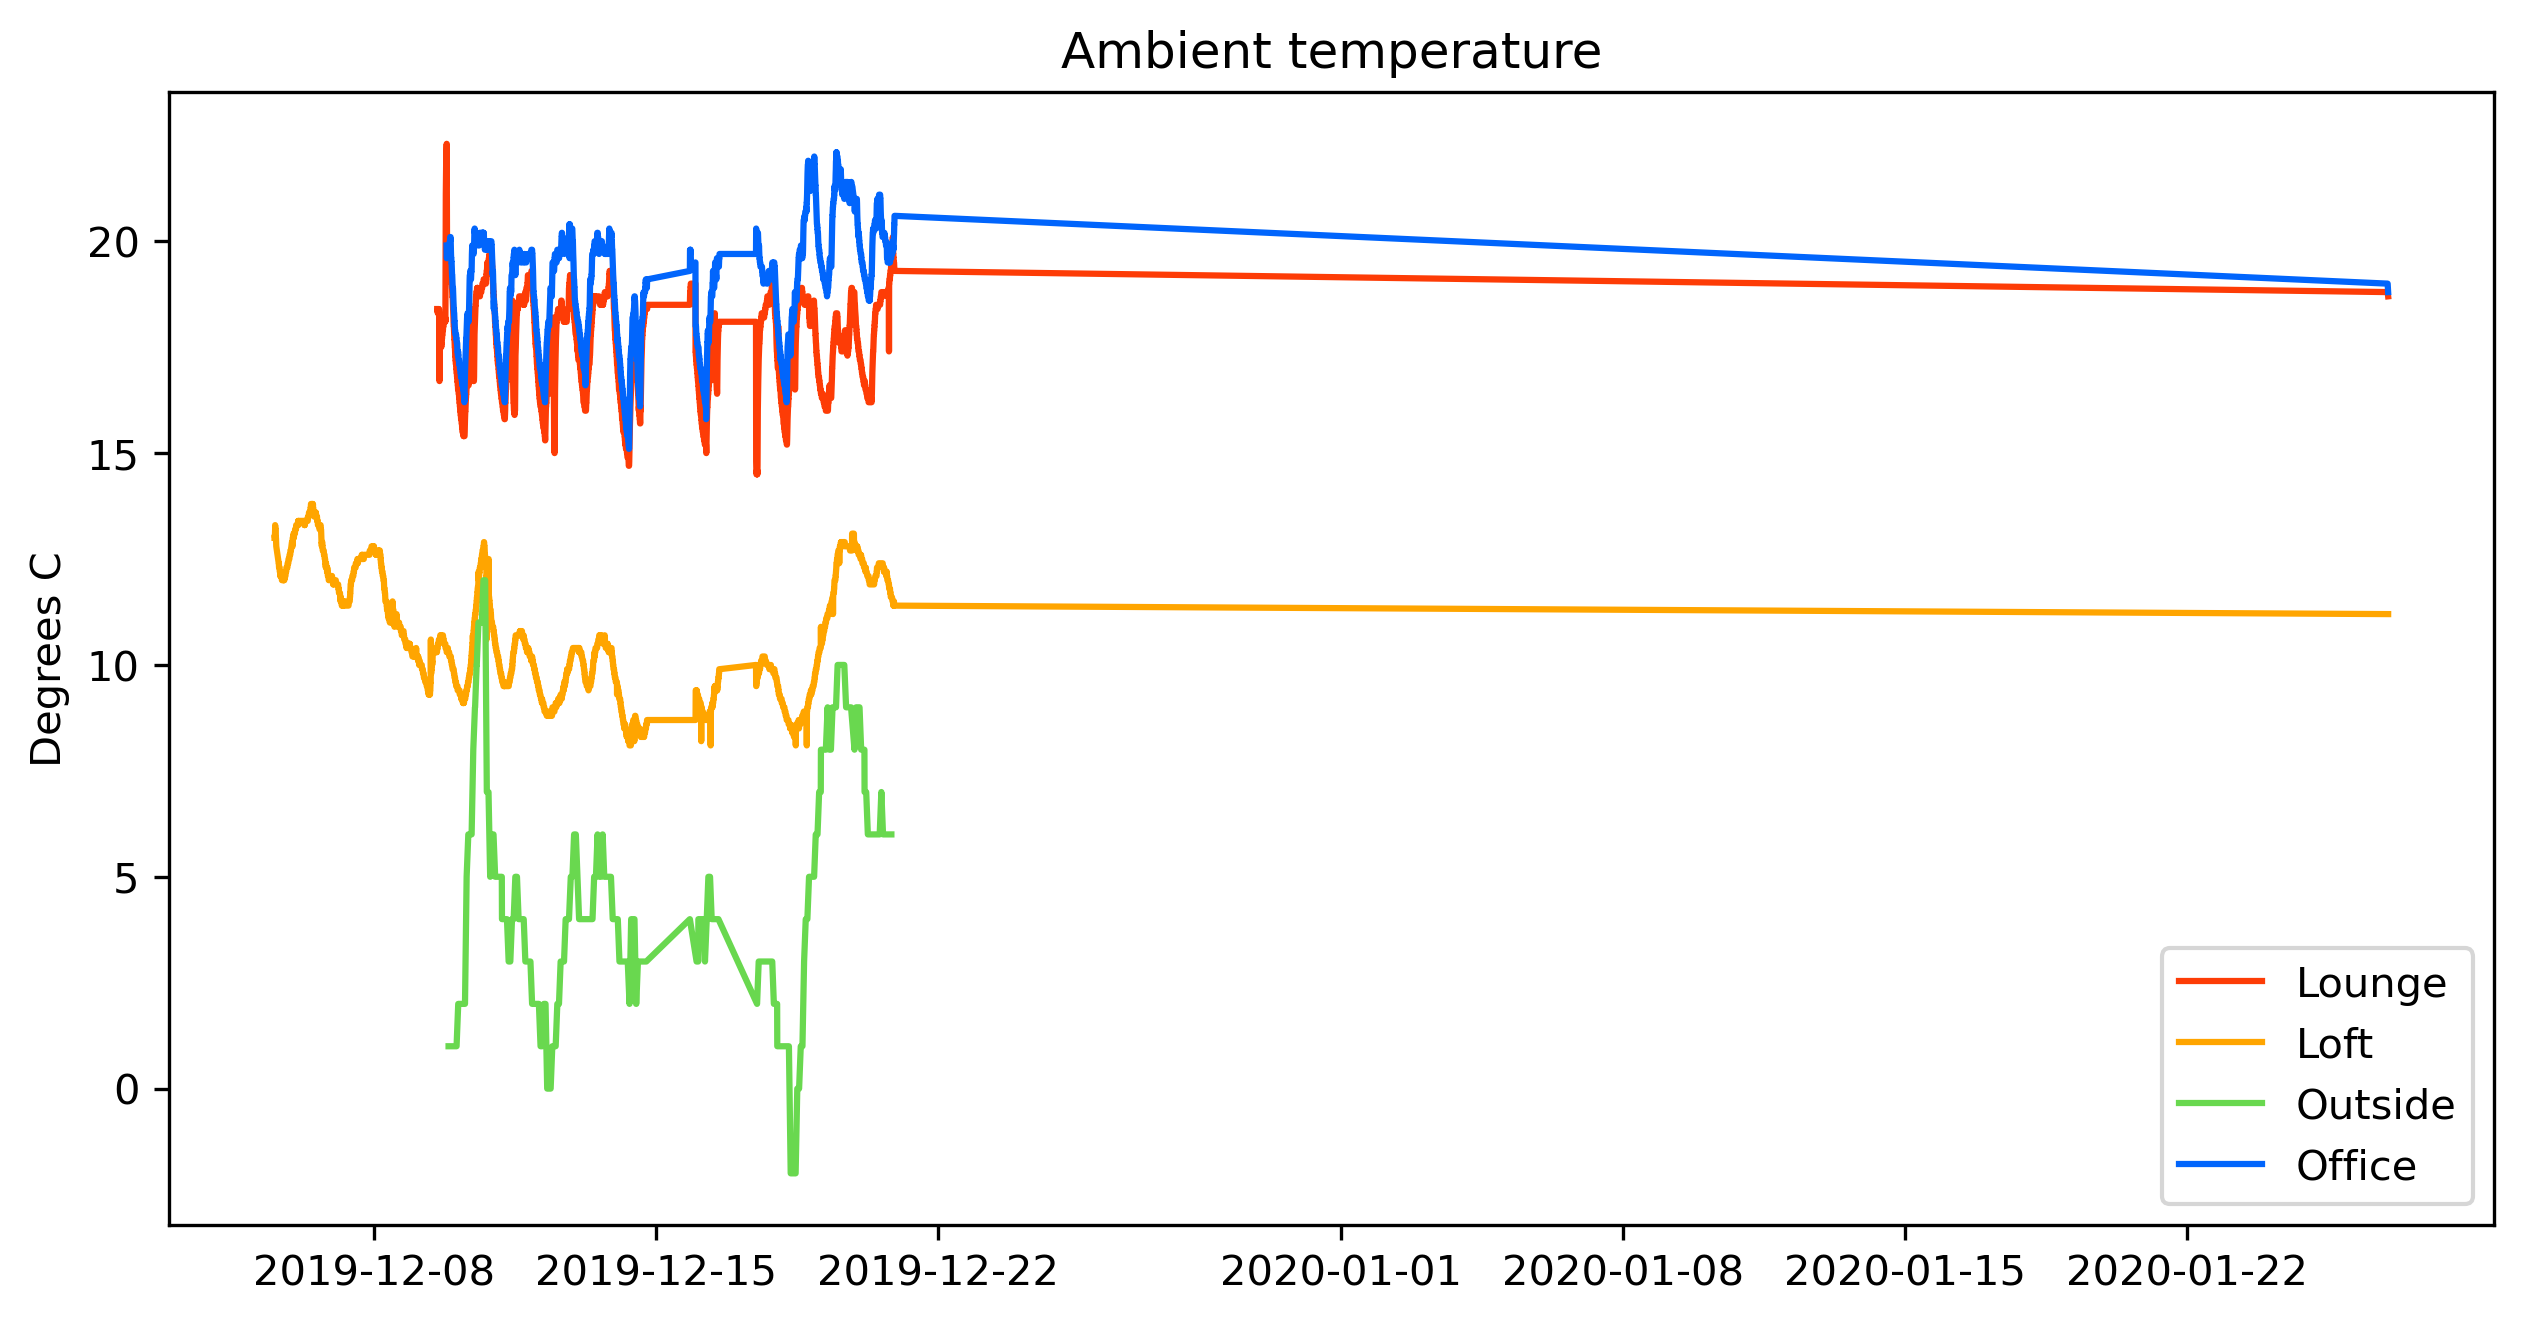

In [1]:
import yappi

from apd.aggregation.analysis import interactable_plot_multiple_charts, Config
from apd.aggregation.analysis import clean_temperature_fluctuations, get_one_sensor_by_deployment
from apd.aggregation.utils import profile_with_yappi

yappi.set_clock_type("wall")

filter_in_db = Config(
    clean=clean_temperature_fluctuations,
    title="Ambient temperature",
    ylabel="Degrees C",
    get_data=get_one_sensor_by_deployment("Temperature"),
)

with profile_with_yappi():
    plot = interactable_plot_multiple_charts(configs=[filter_in_db])
    plot()

yappi.get_func_stats().print_all()


Clock type: CPU
Ordered by: totaltime, desc

name                                  ncall  tsub      ttot      tavg      
..futures\thread.py:52 _WorkItem.run  7      0.000000  9.515625  1.359375
..lchemy\orm\query.py:3232 Query.all  6      0.187500  6.390625  1.065104
..lchemy\orm\loading.py:35 instances  67353  0.046875  6.140625  0.000091
..esult.py:1257 ResultProxy.fetchall  6      0.000000  5.109375  0.851562
..py:1217 ResultProxy._fetchall_impl  6      0.000000  5.078125  0.846354
..38\Lib\threading.py:859 Thread.run  2/1    0.000000  3.125000  1.562500
..rrent\futures\thread.py:66 _worker  2/1    0.000000  3.125000  1.562500
..b\asyncio\events.py:79 Handle._run  29     0.000000  3.125000  0.107759
..WindowsSelectorEventLoop._run_once  17     0.000000  3.125000  0.183824
..lectorEventLoop.run_until_complete  1      0.000000  3.125000  3.125000
..ndowsSelectorEventLoop.run_forever  1      0.000000  3.125000  3.125000
..gation\analysis.py:291 plot_sensor  1      0.031250  3.046875 

..g2\extensions.py:180 _param_escape  3      0.000000  0.000000  0.000000
..\elements.py:232 Table._cloned_set  2      0.000000  0.000000  0.000000
..419 Query._connection_from_session  6      0.000000  0.000000  0.000000
..my\sql\type_api.py:1475 adapt_type  13     0.000000  0.000000  0.000000
..y\sql\elements.py:4594 _literal_as  14     0.000000  0.000000  0.000000
..94 QueryEventsDispatch.__getattr__  8      0.000000  0.000000  0.000000
.._.py:1663 Logger.getEffectiveLevel  3      0.000000  0.000000  0.000000
..ngine\strategies.py:183 on_connect  2      0.000000  0.000000  0.000000
..e.py:737 _ConnectionFairy.__init__  1      0.000000  0.000000  0.000000
..lalchemy\util\compat.py:148 raise_  12     0.000000  0.000000  0.000000
..sre_parse.py:172 SubPattern.append  182    0.000000  0.000000  0.000000
<string>:1 cast                       2      0.000000  0.000000  0.000000
..\langhelpers.py:301 get_cls_kwargs  35/16  0.000000  0.000000  0.000000
..ler_psycopg2._truncated_identifier  

..copg2\extensions.py:164 <dictcomp>  1      0.000000  0.000000  0.000000
..ent\base.py:295 dispatcher.__get__  10     0.000000  0.000000  0.000000
..6k\lib\sre_compile.py:595 isstring  24     0.000000  0.000000  0.000000
..:382 WeakKeyDictionary.__getitem__  245    0.000000  0.000000  0.000000
..py:1293 Connection._cursor_execute  2      0.000000  0.000000  0.000000
..onTransaction._connection_for_bind  6      0.000000  0.000000  0.000000
..e_compile.py:276 _optimize_charset  34     0.000000  0.000000  0.000000
..pe_api.py:450 VARCHAR.dialect_impl  33     0.000000  0.000000  0.000000
..my\engine\result.py:322 <listcomp>  9      0.000000  0.000000  0.000000
..selectable.py:2760 Select.__init__  8      0.000000  0.000000  0.000000
..my\sql\compiler.py:2125 <listcomp>  8      0.000000  0.000000  0.000000
..sql\elements.py:2489 Cast.__init__  2      0.000000  0.000000  0.000000
..PGDialect_psycopg2.type_descriptor  13     0.000000  0.000000  0.000000
..Compiler_psycopg2._bind_processors  

..b\function_base.py:2120 <listcomp>  4      0.000000  0.000000  0.000000
...py:1423 Figure._add_axes_internal  1      0.000000  0.000000  0.000000
..mportlib._bootstrap>:800 find_spec  10     0.000000  0.000000  0.000000
..:94 PoolEventsDispatch.__getattr__  12     0.000000  0.000000  0.000000
..axes.py:256 AxesSubplot.set_ylabel  4      0.000000  0.000000  0.000000
..lines.py:1058 Line2D.set_drawstyle  34     0.000000  0.000000  0.000000
..sforms.py:1940 Affine2D.rotate_deg  18     0.000000  0.000000  0.000000
..>:1010 SourceFileLoader.path_stats  9      0.000000  0.000000  0.000000
..b\cbook\__init__.py:836 <listcomp>  8      0.000000  0.000000  0.000000
..lib\lines.py:743 Line2D._is_sorted  3      0.000000  0.000000  0.000000
..\elements.py:709 Column.comparator  4      0.000000  0.000000  0.000000
..tlib\axis.py:1951 XAxis._get_label  1      0.000000  0.000000  0.000000
..ore\numerictypes.py:365 issubdtype  4      0.000000  0.000000  0.000000
..\axis.py:1605 YAxis.set_label_text  

..plotlib\gridspec.py:204 _normalize  1      0.000000  0.000000  0.000000
..figure.py:199 SubplotParams.update  2      0.000000  0.000000  0.000000
.._json.py:133 register_default_json  1      0.000000  0.000000  0.000000
..p>:143 _ModuleLockManager.__init__  10     0.000000  0.000000  0.000000
..:513 Figure.set_constrained_layout  1      0.000000  0.000000  0.000000
.. FontProperties.get_size_in_points  1      0.000000  0.000000  0.000000
..60 ScalarFormatter.set_useMathText  16     0.000000  0.000000  0.000000
..er.py:755 FontProperties.set_style  23     0.000000  0.000000  0.000000
...py:900 AutoDateFormatter.__init__  2      0.000000  0.000000  0.000000
..ok\__init__.py:2125 _check_getitem  4      0.000000  0.000000  0.000000
..py:1210 Line2D.set_markeredgecolor  30     0.000000  0.000000  0.000000
..psycopg2\extras.py:261 RealDictRow  1      0.000000  0.000000  0.000000
...py:978 Rectangle._update_property  42     0.000000  0.000000  0.000000
..rm\session.py:655 Session.__init__  

<frozen importlib._bootstrap>:176 cb  10     0.000000  0.000000  0.000000
..tplotlib\artist.py:1095 Line2D.set  70     0.000000  0.000000  0.000000
..ogging\__init__.py:189 _checkLevel  3      0.000000  0.000000  0.000000
..k\__init__.py:827 Grouper.__init__  2      0.000000  0.000000  0.000000
..tlib\axis.py:2166 XAxis.get_minpos  1      0.000000  0.000000  0.000000
..lalchemy\orm\query.py:4148 __new__  32     0.000000  0.000000  0.000000
..abc.py:816 WeakKeyDictionary.clear  1      0.000000  0.000000  0.000000
..lections.py:316 OrderedDict.values  5      0.000000  0.000000  0.000000
..lements.py:365 Column.get_children  27     0.000000  0.000000  0.000000
.. ExtensionFileLoader.create_module  1      0.000000  0.000000  0.000000
..d_inline.py:59 draw_if_interactive  1      0.000000  0.000000  0.000000
..157 CallbackRegistry._remove_proxy  2      0.000000  0.000000  0.000000
..768 IdentityTransform.is_separable  8      0.000000  0.000000  0.000000
..hon38\Lib\contextlib.py:238 helper  

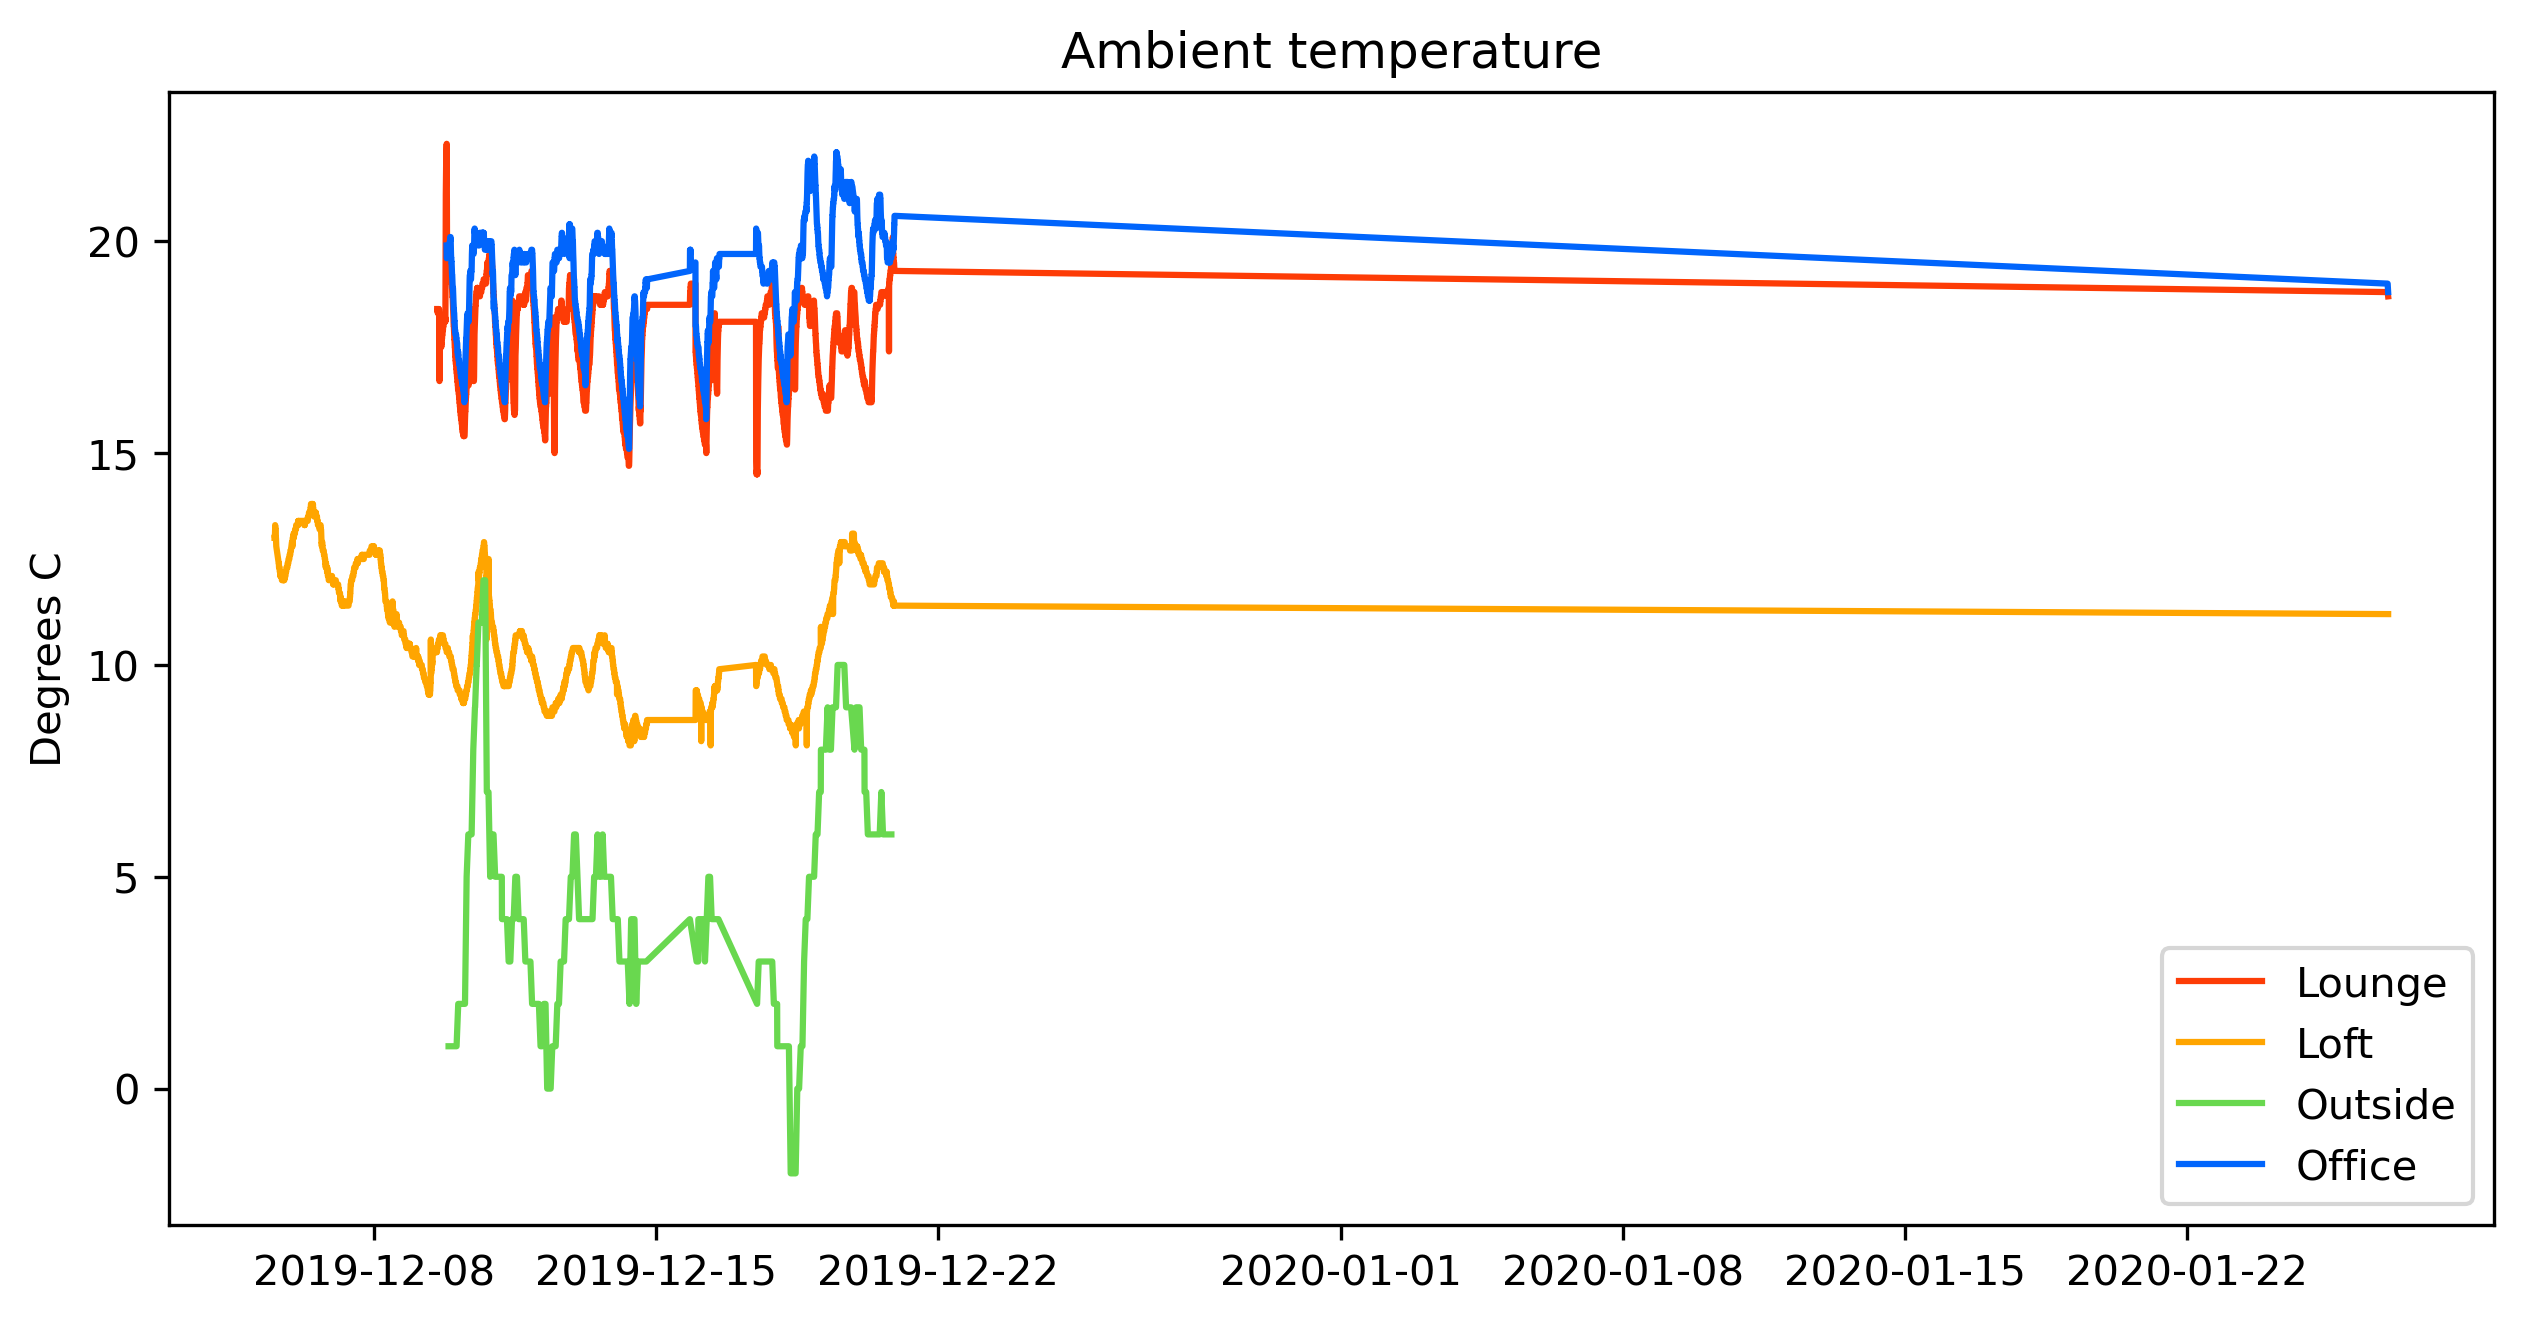

In [1]:
import yappi

from apd.aggregation.analysis import interactable_plot_multiple_charts, Config, clean_temperature_fluctuations, get_data_by_deployment
from apd.aggregation.utils import profile_with_yappi

async def filter_and_clean_temperature_fluctuations(datapoints):
    filtered = (item async for item in datapoints if item.sensor_name=="Temperature")
    cleaned = clean_temperature_fluctuations(filtered)
    async for item in cleaned:
        yield item

filter_in_python = Config(
    clean=filter_and_clean_temperature_fluctuations,
    title="Ambient temperature",
    ylabel="Degrees C",
    get_data=get_data_by_deployment,
)

with profile_with_yappi():
    plot = interactable_plot_multiple_charts(configs=[filter_in_python])
    plot()

yappi.get_func_stats().print_all()

In [2]:
from apd.aggregation.utils import yappi_package_matches
import yappi

yappi.get_func_stats().save("callgrind.filter_in_python", "callgrind") 